### Tasks

##### Task 1

In [2]:
# 1mport

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Set up data 

source = load_boston()

data = pd.DataFrame(source.data, columns=source.feature_names)
prices = source.target

In [9]:
crim = data['CRIM'][:40]
price = prices[:40]

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
# Get line of best fit
fitted_list = []
powers = 4

for i in range(1,powers):
    fit = np.poly1d(np.polyfit(crim,price,i))
    fitted_list.append(fit)

xx = np.arange(min(crim),max(crim),0.1)

Text(0.5, 1.0, 'House Prices vs Crime Rate')

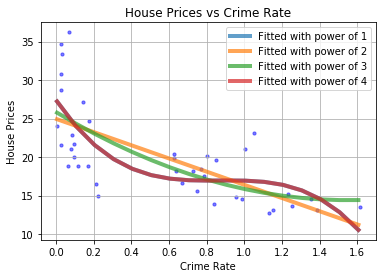

In [45]:
plt.scatter(crim,price,c='blue',alpha=0.5,s=10)

for x in range(powers):
    plt.plot(xx,fitted_list[x-1](xx),alpha=0.7,lw=4,label=f'Fitted with power of {x+1}')

plt.legend()
plt.grid(True)
plt.xlabel('Crime Rate'); plt.ylabel('House Prices')
plt.title('House Prices vs Crime Rate')


##### Task 2

In [47]:
# Import even more stuff

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [75]:
ages = data['AGE'][:40].values.reshape(-1,1)

In [63]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(ages)
poly.fit(x_poly,price)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

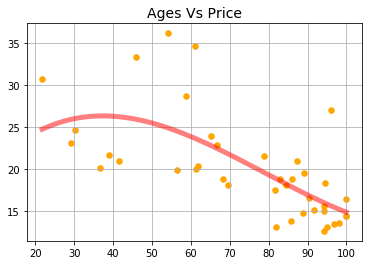

In [89]:
# Linear model
model = LinearRegression()
model.fit(x_poly,price)

xx=(np.arange(min(age[0]),max(age[0]),0.1)).reshape(-1,1)

plt.scatter(ages,price,c='orange',s=30)
plt.grid(True)
plt.title('Ages Vs Price', size=14)
plt.plot(xx,model.predict(poly.fit_transform(xx)),c='red',lw=5,alpha=0.5)
plt.show()

##### Task 4

In [124]:
dataset = pd.read_csv(r'C:\Users\User\Documents\predict_admission.csv')

In [152]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [119]:
comb = pd.DataFrame(dataset)

gre = comb['GRE Score'][:40]
target = comb['Chance of Admit '][:40]

<IPython.core.display.Javascript object>


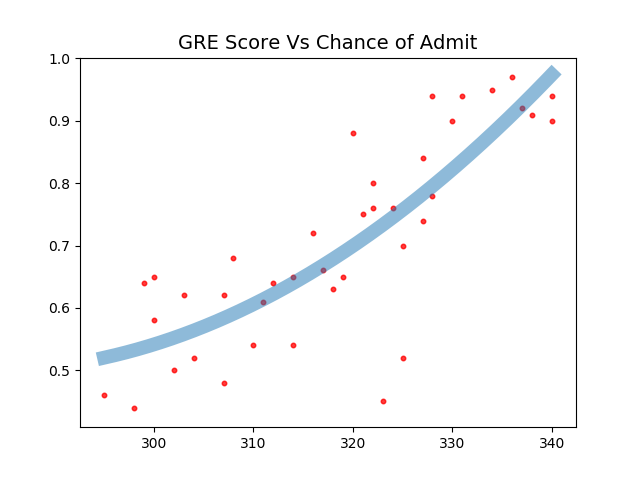

R-value of 0.808504536627697


In [164]:
plt.title('GRE Score Vs Chance of Admit', size=14)
plt.scatter(gre,target,alpha=0.5,s=10,color='red')
plt.show()

# Wow, very high r value
print('R-value of' ,np.corrcoef(gre,target)[0][1])

fitter = np.poly1d(np.polyfit(gre,target,2))

xx = np.arange(min(gre),max(gre),0.01)
yy = [fitter(i) for i in xx]

plt.title('GRE Score Vs Chance of Admit', size=14)
plt.scatter(gre,target,alpha=0.5,s=10,color='red')
plt.plot(xx,yy,alpha=0.5,lw=10)

#### Task 5

In [153]:
toefl = dataset['TOEFL Score'][:40]

[455, 431, 420, 432, 417, 445, 430, 409, 404, 431, 431, 438, 440, 416, 415, 419, 424, 425, 428, 405, 419, 439, 444, 453, 455, 460, 431, 396, 388, 409, 397, 430, 456, 454, 443, 430, 405, 405, 409, 415]


<IPython.core.display.Javascript object>


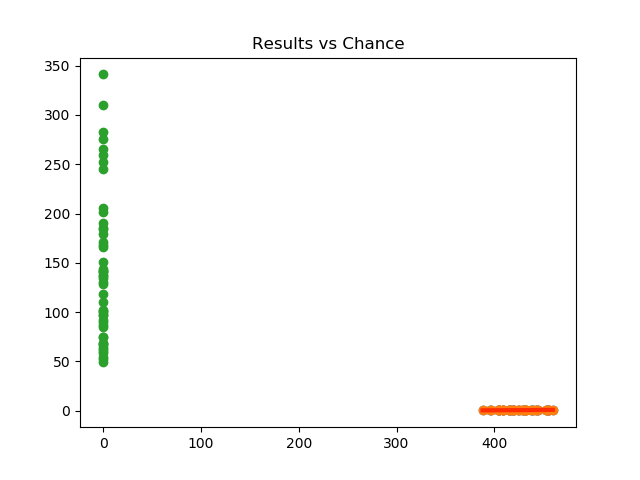

In [174]:
combo = []
for loop in range(len(gre)):
    combo.append(gre[loop]+toefl[loop])
print(combo)

plt.scatter(combo,target)
plt.show()

fitt = np.poly1d(np.polyfit(combo,target,2))

plt.scatter(combo,target)

xx = np.arange(min(combo),max(combo),0.1)
yy = [fitt(i) for i in xx]
plt.plot(xx,yy,c='red',lw=3,alpha=0.65)
plt.title('Results vs Chance')

plt.show()

In [188]:
%matplotlib

Using matplotlib backend: nbAgg


In [198]:
from sklearn.datasets import load_wine

In [199]:
subs = load_wine()

data = pd.DataFrame(subs.data, columns=subs.feature_names)

target = subs.target[:50]

In [202]:
alc = data['alcohol'][:100]
target = data['magnesium'][:100]

In [252]:
fitlist = []

for i in range(1,6):
    fit = np.poly1d(np.polyfit(alc,target,i))
    fitlist.append(fit)

xx = np.arange(min(alc),max(alc),0.1)

<IPython.core.display.Javascript object>


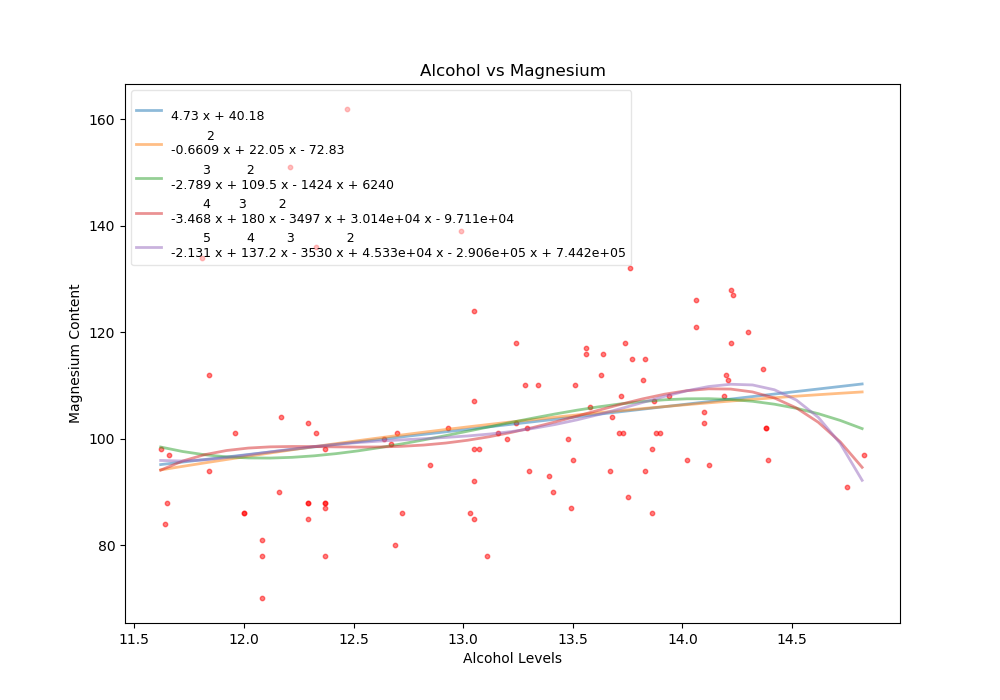

Correlation = 0.2467525029113836


In [254]:
plt.figure(figsize=(10,7))

plt.scatter(alc,target,s=10,c='red',alpha=0.5)
plt.xlabel('Alcohol Levels'); plt.ylabel('Magnesium Content')
plt.title("Alcohol vs Magnesium")

for x in fitlist:
    plt.plot(xx,x(xx),lw=2,alpha=0.5,label=f'{x}')


plt.legend(prop={'size': 9}, ncol=1,framealpha=0.5,loc=2)
plt.show()
print('Correlation =' ,np.corrcoef(alc,target)[0][1])